# Sentiment Analysis on Reviews
This project classifies movie/restaurant reviews as positive or negative using NLP techniques.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('data/reviews_sample.csv')
df['review'] = df['review'].str.lower()
print(df.head())

                                    review sentiment
0    i loved this movie, it was fantastic!  positive
1    worst film ever, total waste of time.  negative
2      amazing acting and great storyline.  positive
3       terrible direction and bad script.  negative
4  it was okay, not too bad but not great.   neutral


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [4]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [5]:
nb = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print('Naive Bayes:\n', classification_report(y_test, y_pred_nb))

Naive Bayes:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



c:\Users\SNU\anaconda3\envs\practice\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SNU\anaconda3\envs\practice\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SNU\anaconda3\envs\practice\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [6]:
lr = LogisticRegression(max_iter=200).fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print('Logistic Regression:\n', classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



c:\Users\SNU\anaconda3\envs\practice\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SNU\anaconda3\envs\practice\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SNU\anaconda3\envs\practice\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


C:\Temp\ipykernel_22460\2833894688.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  disp.figure_.show()


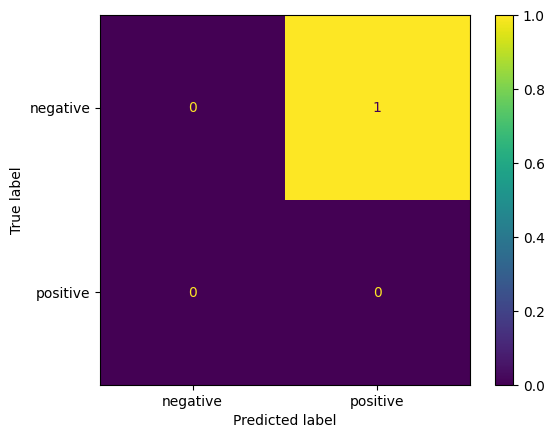

In [7]:
disp = ConfusionMatrixDisplay.from_estimator(lr, X_test_tfidf, y_test)
disp.figure_.show()